In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def concat_csv_files(file_list):
    dataframes = []
    for file in file_list:
        df = pd.read_csv(file)
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [25]:
df = concat_csv_files(["gender_ripser_h1h2_2.csv", "ripser_h1h2.csv"])


metric_columns = [col for col in df.columns if col.startswith('metric')]

In [26]:
df

,batch_size,learning_rate,split_count,cnt_min,cnt_max,embedding_dim,category_embedding_dim,hidden_size,checkpoint,epoch_num,...,metric_ripser_sum_H1,time_rankme,time_coherence,time_pseudo_condition_number,time_alpha_req,time_stable_rank,time_ne_sum,time_self_clustering,time_ripser_sum_H0,time_ripser_sum_H1
0,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=00...,0,...,1.6794,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0107,0.0107
1,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=01...,1,...,1.8530,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0118,0.0118
2,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=02...,2,...,2.2415,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0177,0.0177
3,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=03...,3,...,2.5285,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0128,0.0128
4,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=04...,4,...,2.7409,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0104,0.0104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=07...,7,...,3.5772,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0115,0.0115
526,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=08...,8,...,3.6709,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0118,0.0118
527,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=09...,9,...,4.0550,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0107,0.0107
528,64,0.001,3,10,50,16,8,128,checkpoints/model_64_0.001_3_10_50_128epoch=10...,10,...,4.1242,0.0001,0.0,0.0,0.0001,0.0,0.0008,0.0001,0.0119,0.0119


In [27]:
df.to_csv("gender_ripser_h1h2.csv")

In [28]:
df["metric_ripser"].corr(df["accuracy"])

KeyError: 'metric_ripser'

In [8]:
df["metric_ripser"].mean()

np.float64(-1538.3131581818182)

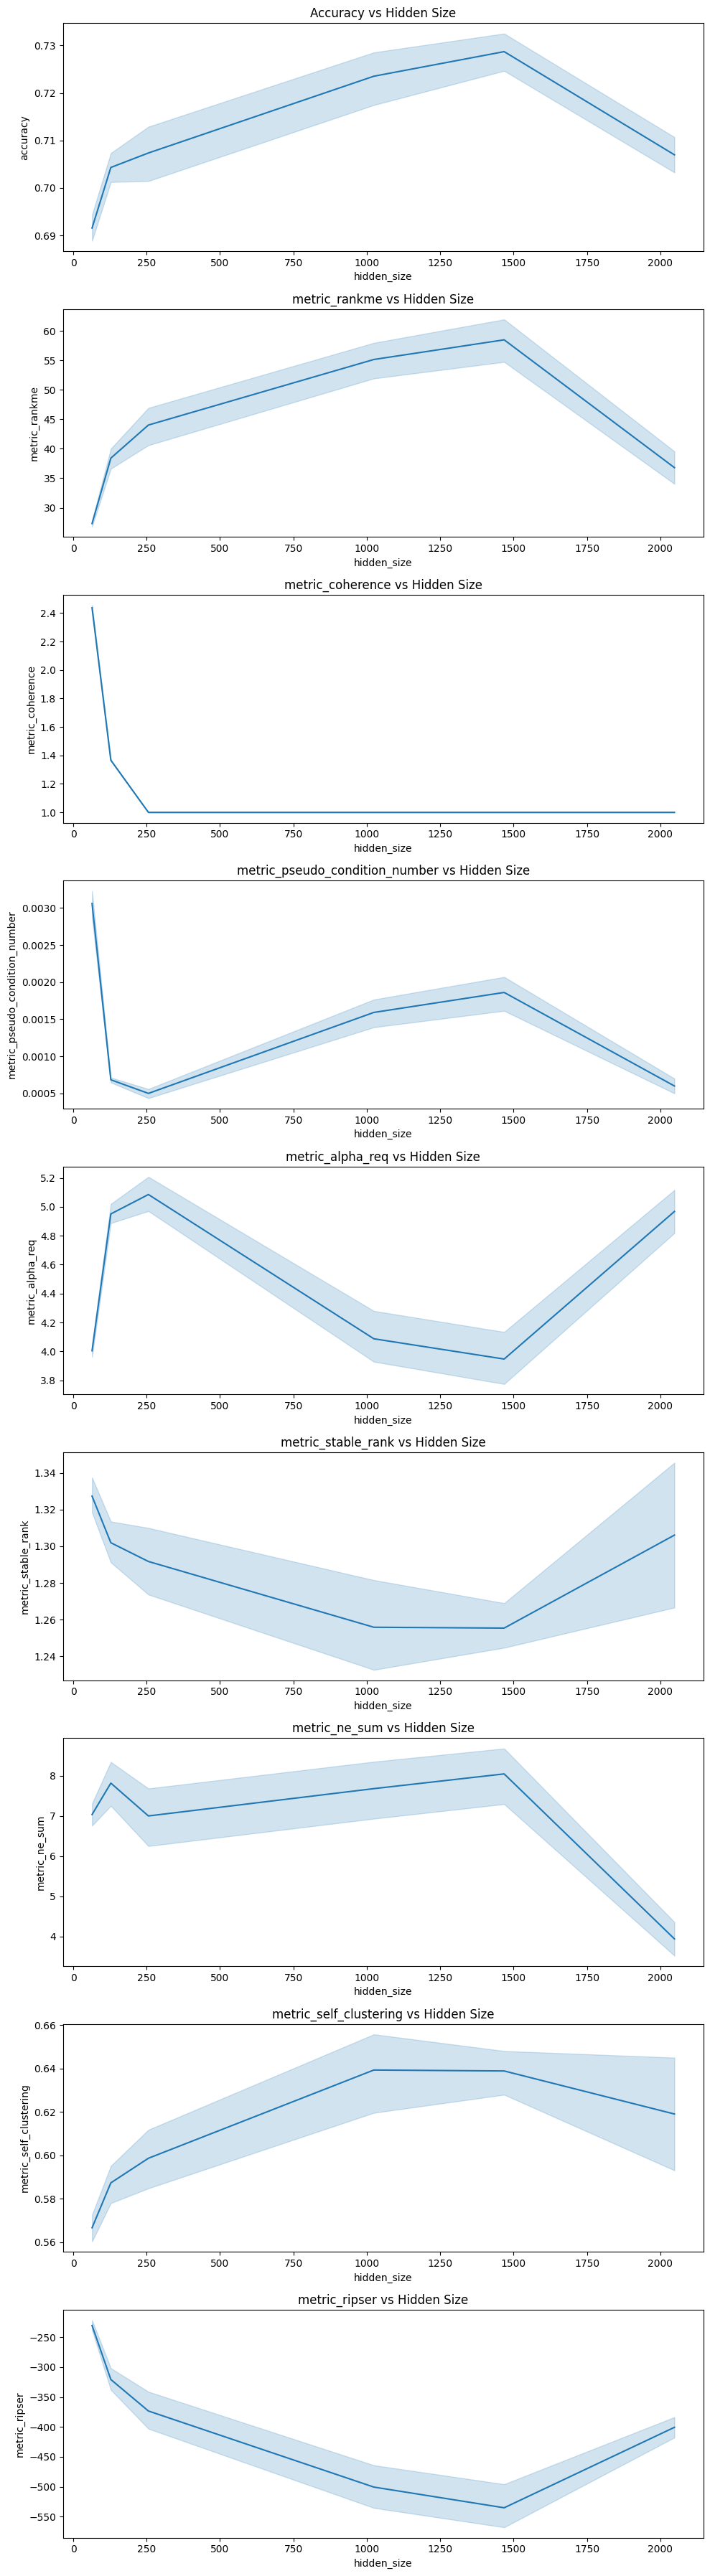

In [15]:
fig, axes = plt.subplots(nrows=len(metric_columns) + 1, figsize=(10, 4 * (len(metric_columns) + 1)))

# accuracy от hidden_size
sns.lineplot(data=df, x="hidden_size", y="accuracy", ax=axes[0])
axes[0].set_title("Accuracy vs Hidden Size")

# метрики от hidden_size
for i, metric in enumerate(metric_columns):
    sns.lineplot(data=df, x="hidden_size", y=metric, ax=axes[i+1])
    axes[i+1].set_title(f"{metric} vs Hidden Size")

plt.tight_layout()
# tools.display_dataframe_to_user(name="Hidden Size Metrics Dataset", dataframe=df)
plt.show()

/tmp/ipykernel_2671989/212608677.py:18: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = stats.pearsonr(subset[metric], subset["accuracy"])


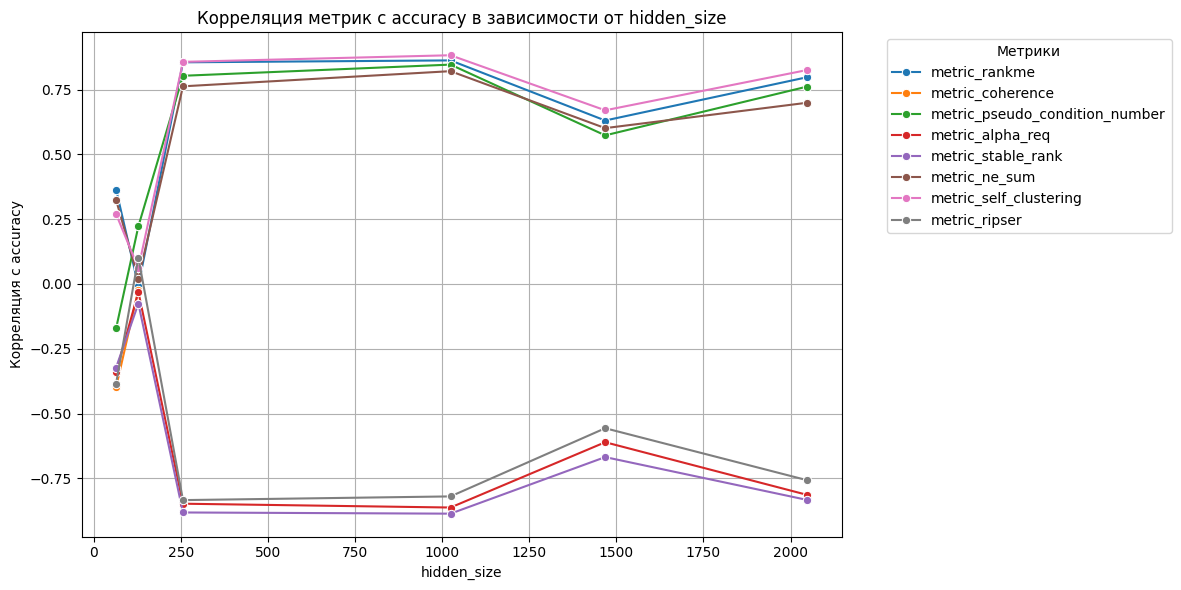

In [20]:
from scipy import stats

metric_columns = [col for col in df.columns if col.startswith("metric_")]

# Список для хранения корреляций
correlation_results = []

# Группируем данные по hidden_size
hidden_sizes = sorted(df["hidden_size"].unique())

# Вычисляем корреляцию каждой метрики с accuracy для каждого hidden_size
for h_size in hidden_sizes:
    subset = df[df["hidden_size"] == h_size]
    row = {"hidden_size": h_size}

    for metric in metric_columns:
        if len(subset) > 1:  # Проверяем, что достаточно данных
            corr, pval = stats.pearsonr(subset[metric], subset["accuracy"])
            row[metric] = corr
        else:
            row[metric] = None  # Если данных недостаточно, ставим None

    correlation_results.append(row)

# Преобразуем в DataFrame
corr_df = pd.DataFrame(correlation_results)

# Построение графика
plt.figure(figsize=(12, 6))

for metric in metric_columns:
    sns.lineplot(data=corr_df, x="hidden_size", y=metric, marker="o", label=metric)

plt.title("Корреляция метрик с accuracy в зависимости от hidden_size")
plt.xlabel("hidden_size")
plt.ylabel("Корреляция с accuracy")
plt.legend(title="Метрики", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
variability = corr_df[metric_columns].std().sort_values()
print(variability)

metric_coherence                  0.266158
metric_stable_rank                0.365711
metric_alpha_req                  0.368847
metric_self_clustering            0.376158
metric_rankme                     0.378759
metric_ripser                     0.400522
metric_pseudo_condition_number    0.443350
metric_ne_sum                     0.682987
dtype: float64


<>:12: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
/tmp/ipykernel_4143878/2377526874.py:12: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if name is "Gender":
/tmp/ipykernel_4143878/2377526874.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True)


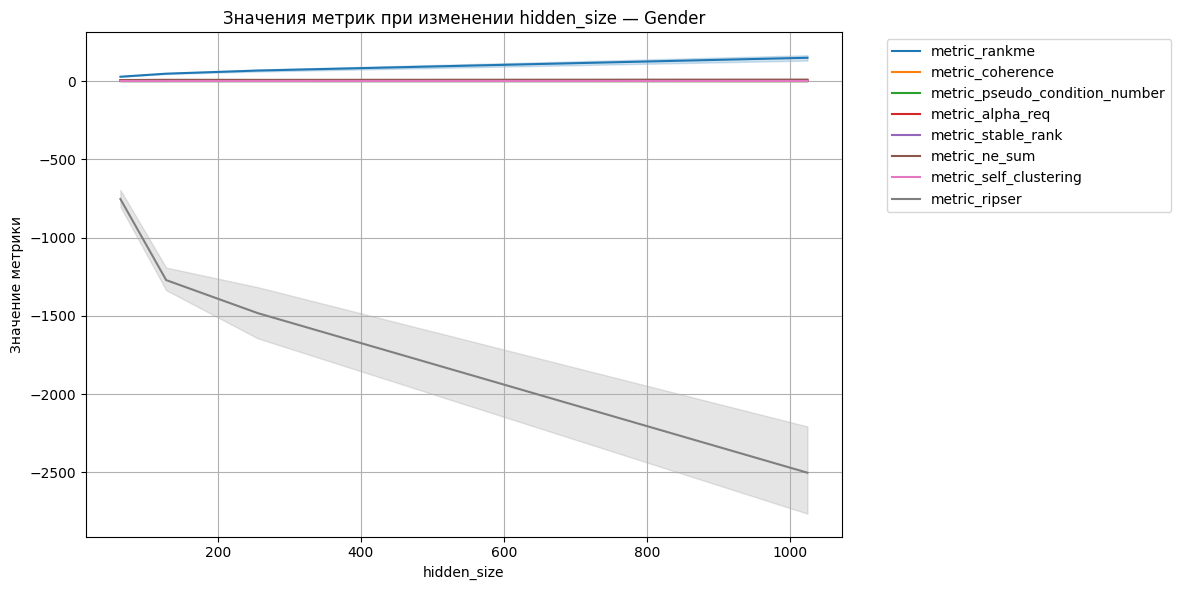

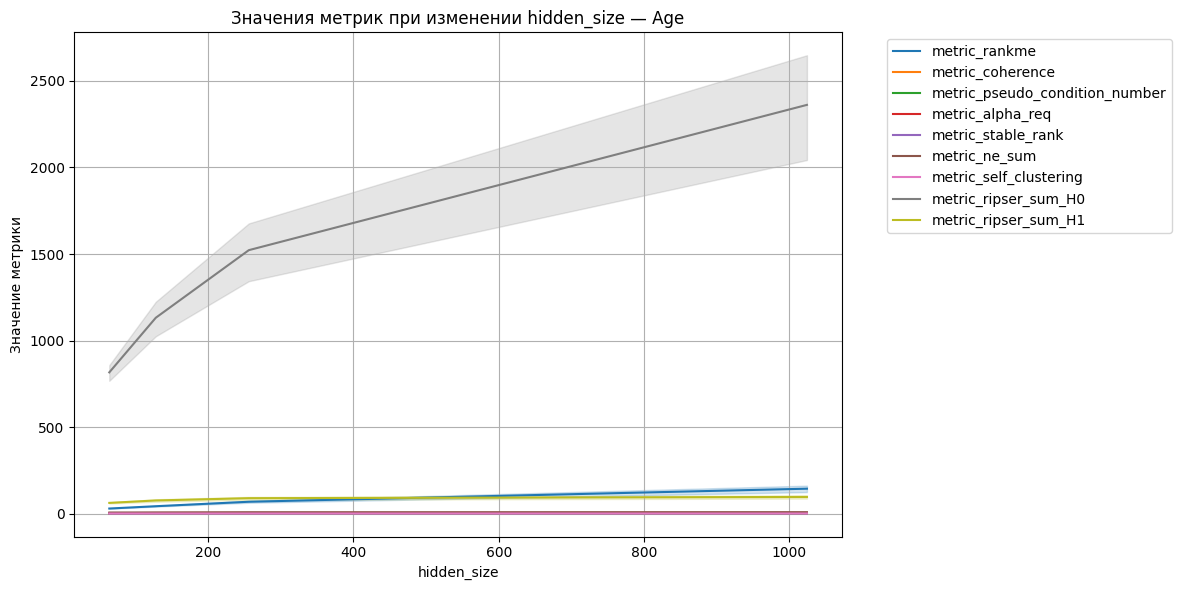

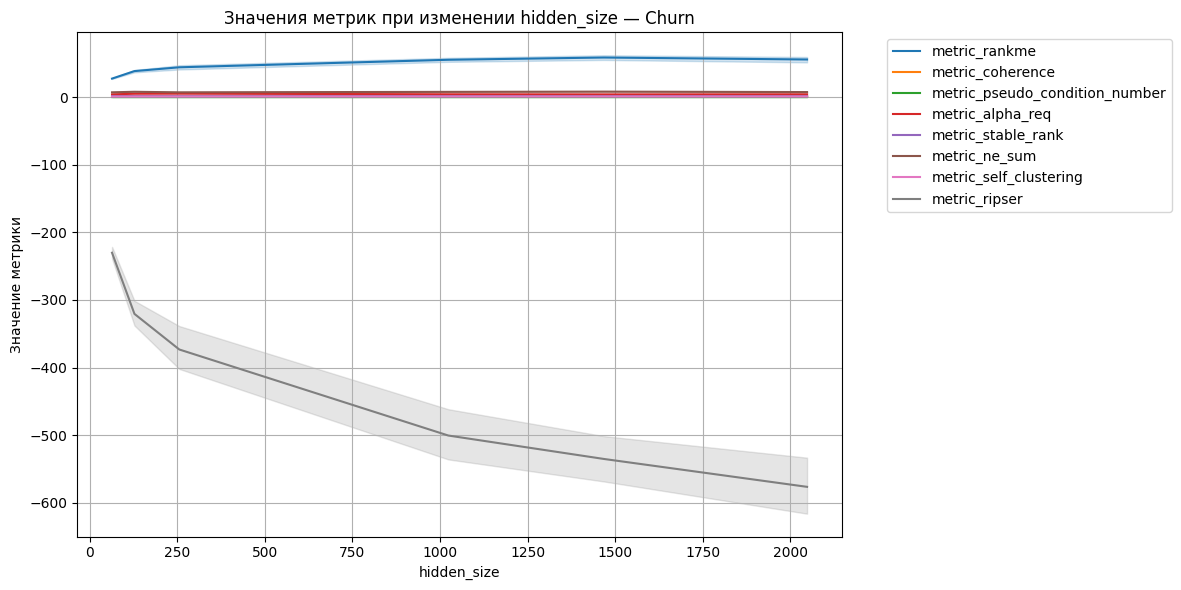

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = {
    "Gender": "csv_results/gender_tr_hidden_size.csv",
    "Age": "age_tr_hidden_size2.csv",
    "Churn": "csv_results/rosbank_hidden_size.csv"
}

for name, path in files.items():
    if name is "Gender":
        df = pd.read_csv(path, delim_whitespace=True)
    else:
        df = pd.read_csv(path)
    metric_columns = [col for col in df.columns if col.startswith("metric_")]
    plt.figure(figsize=(12, 6))
    for col in metric_columns:
        sns.lineplot(data=df, x="hidden_size", y=col, label=col)
    plt.title(f"Значения метрик при изменении hidden_size — {name}")
    plt.xlabel("hidden_size")
    plt.ylabel("Значение метрики")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.grid(True)
    plt.show()


<>:4: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
/tmp/ipykernel_4143878/3330494890.py:4: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if name is "Gender":
/tmp/ipykernel_4143878/3330494890.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True)
/tmp/ipykernel_4143878/3330494890.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(subset[metric], subset["accuracy"])


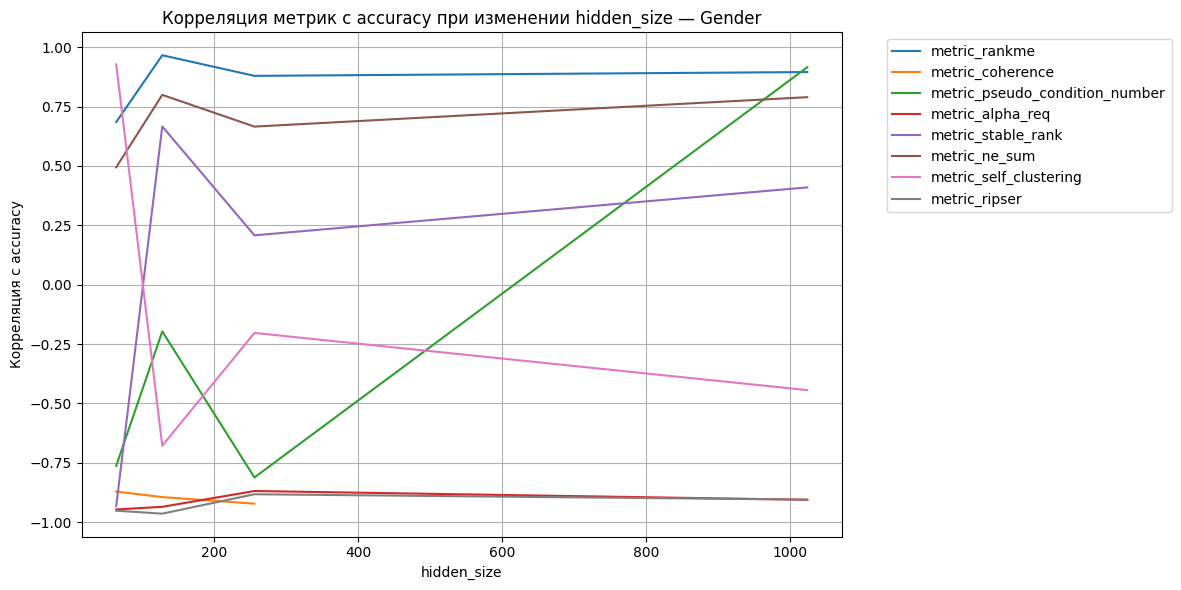

/tmp/ipykernel_4143878/3330494890.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(subset[metric], subset["accuracy"])


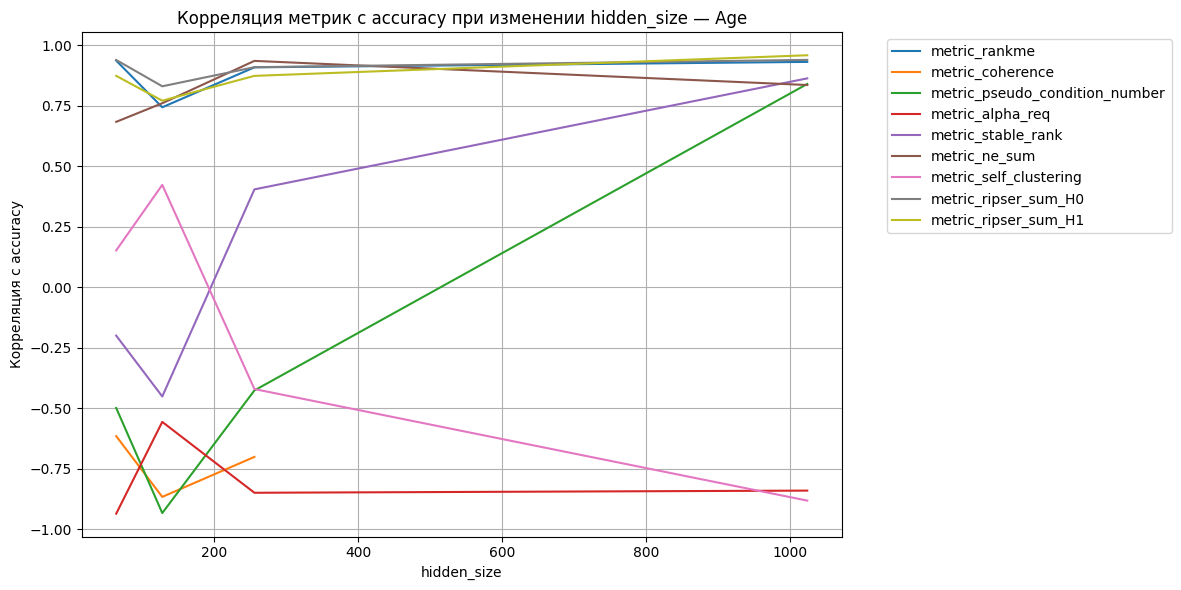

/tmp/ipykernel_4143878/3330494890.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(subset[metric], subset["accuracy"])


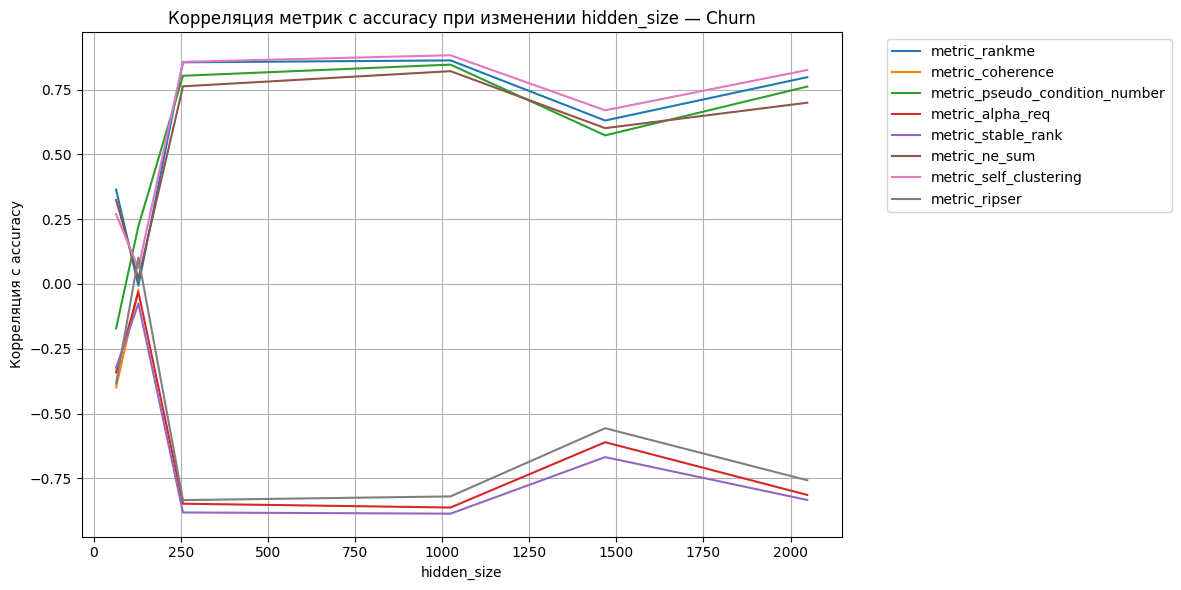

In [11]:
from scipy.stats import pearsonr

for name, path in files.items():
    if name is "Gender":
        df = pd.read_csv(path, delim_whitespace=True)
    else:
        df = pd.read_csv(path)
    metric_columns = [col for col in df.columns if col.startswith("metric_")]
    hidden_sizes = sorted(df["hidden_size"].unique())
    
    correlation_records = []
    for h in hidden_sizes:
        subset = df[df["hidden_size"] == h]
        row = {"hidden_size": h}
        for metric in metric_columns:
            if len(subset) > 1:
                corr, _ = pearsonr(subset[metric], subset["accuracy"])
                row[metric] = corr
        correlation_records.append(row)
    
    corr_df = pd.DataFrame(correlation_records)
    
    plt.figure(figsize=(12, 6))
    for col in metric_columns:
        sns.lineplot(data=corr_df, x="hidden_size", y=col, label=col)
    plt.title(f"Корреляция метрик с accuracy при изменении hidden_size — {name}")
    plt.xlabel("hidden_size")
    plt.ylabel("Корреляция с accuracy")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<>:15: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
/tmp/ipykernel_4143878/2308572275.py:15: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if name is "Gender":
/tmp/ipykernel_4143878/2308572275.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True)
/tmp/ipykernel_4143878/2308572275.py:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(subset[metric], subset["accuracy"])
/tmp/ipykernel_4143878/2308572275.py:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(subset[metric], subset["accuracy"])
/tmp/ipykernel_4143878/2308572275.py:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defi

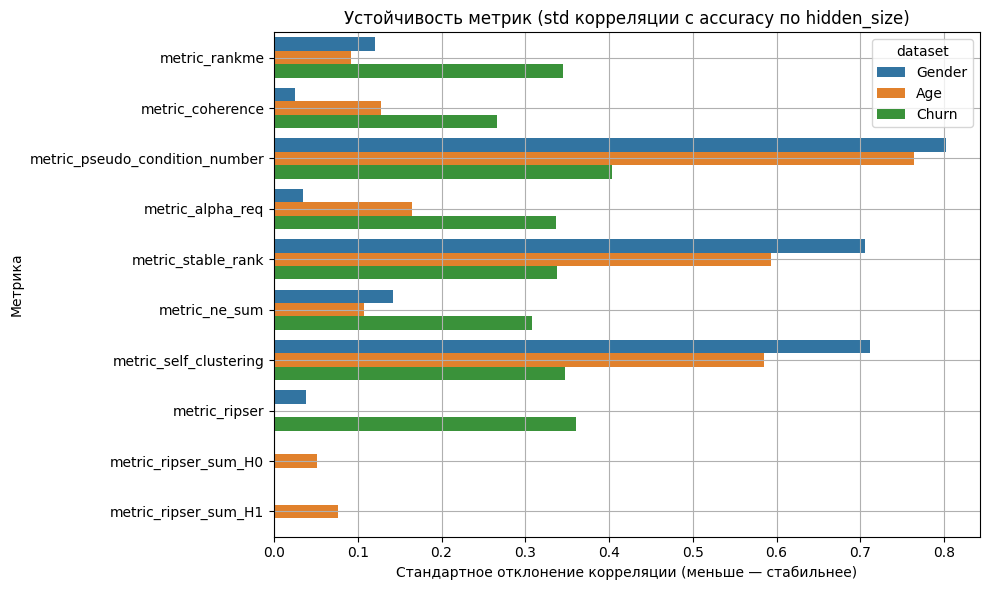

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# files = {
#     "Gender": "gender_tr_hidden_size.csv",
#     "Age": "age_tr_hidden_size.csv",
#     "Churn": "rosbank_hidden_size.csv"
# }

variability_list = []

for name, path in files.items():
    if name is "Gender":
        df = pd.read_csv(path, delim_whitespace=True)
    else:
        df = pd.read_csv(path)
    metric_columns = [col for col in df.columns if col.startswith("metric_")]
    hidden_sizes = sorted(df["hidden_size"].unique())
    
    correlation_records = []
    for h in hidden_sizes:
        subset = df[df["hidden_size"] == h]
        row = {"hidden_size": h}
        for metric in metric_columns:
            if len(subset) > 1:
                corr, _ = pearsonr(subset[metric], subset["accuracy"])
                row[metric] = corr
        correlation_records.append(row)
    
    corr_df = pd.DataFrame(correlation_records)
    
    variability = corr_df[metric_columns].std().reset_index()
    variability.columns = ["metric", "std_corr"]
    variability["dataset"] = name
    variability_list.append(variability)

# Объединяем всё
variability_all = pd.concat(variability_list)

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(data=variability_all, x="std_corr", y="metric", hue="dataset")
plt.title("Устойчивость метрик (std корреляции с accuracy по hidden_size)")
plt.xlabel("Стандартное отклонение корреляции (меньше — стабильнее)")
plt.ylabel("Метрика")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



files = {
    "Gender": "csv_results/gender_tr_hidden_size.csv",
    "Age": "csv_results/age_tr_hidden_size2.csv",
    "Churn": "csv_results/rosbank_hidden_size.csv"
}

def plot_metric_correlation(df, dataset_name):
    df = df[df['hidden_size']==128]
    metric_cols = [col for col in df.columns if col.startswith("metric_")]

    # Вычисление корреляций Пирсона и Спирмена
    pearson_corrs = df[metric_cols].corrwith(df["accuracy"], method="pearson")
    spearman_corrs = df[metric_cols].corrwith(df["accuracy"], method="spearman")

    corr_df = pd.DataFrame({
        "Metric": metric_cols,
        "Pearson": pearson_corrs.values,
        "Spearman": spearman_corrs.values
    })

    # Сортировка по Pearson
    corr_df = corr_df.sort_values(by="Pearson", ascending=True).reset_index(drop=True)

    # Визуализация
    plt.figure(figsize=(10, 6))
    bar_width = 0.4
    indices = range(len(corr_df))

    plt.barh(
        y=[i + bar_width/2 for i in indices], width=corr_df["Pearson"],
        height=bar_width, label="Pearson", color="skyblue"
    )
    plt.barh(
        y=[i - bar_width/2 for i in indices], width=corr_df["Spearman"],
        height=bar_width, label="Spearman", color="salmon"
    )

    # Подписи значений
    for i, row in corr_df.iterrows():
        plt.text(row["Pearson"] + 0.02, i + bar_width/2, f"{row['Pearson']:.2f}",
                 va="center", ha="left", fontsize=9)
        plt.text(row["Spearman"] + 0.02, i - bar_width/2, f"{row['Spearman']:.2f}",
                 va="center", ha="left", fontsize=9)

    plt.yticks(indices, corr_df["Metric"])
    plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
    plt.xlabel("Correlation")
    plt.title(f"Сравнение корреляций метрик с accuracy ({dataset_name})")
    plt.legend()
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_288857/2345796473.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True)


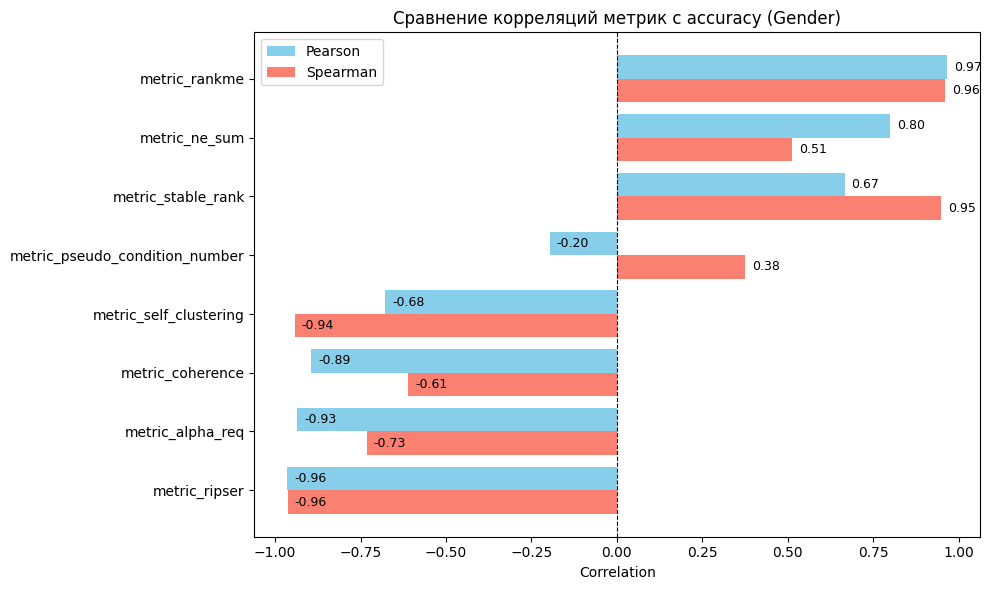

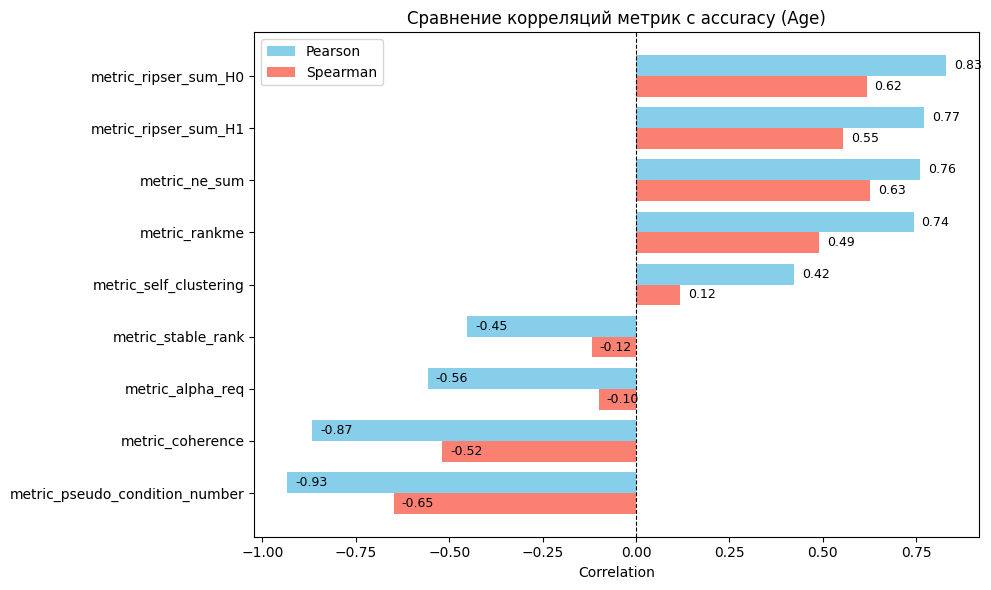

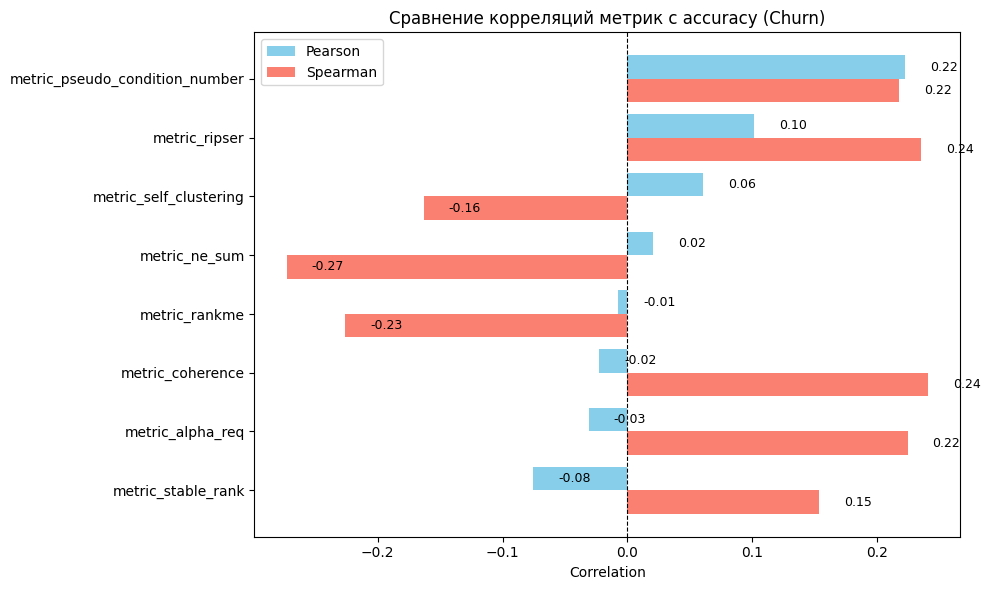

In [5]:
for name, path in files.items():
    if name == "Gender":
        df = pd.read_csv(path, delim_whitespace=True)
    else:
        df = pd.read_csv(path)
    plot_metric_correlation(df, name)

In [19]:
df_gender = pd.read_csv("gender_tr_hidden_size.csv", delim_whitespace=True)
df_age = pd.read_csv("age_tr_hidden_size.csv", index_col=0)

# Проверка на полное совпадение
print((df_gender == df_age).all())
print(df_gender.equals(df_age))

batch_size                            True
learning_rate                         True
split_count                           True
cnt_min                               True
cnt_max                               True
embedding_dim                         True
category_embedding_dim                True
hidden_size                           True
checkpoint                            True
epoch_num                             True
accuracy                              True
early_stop_epoch                      True
hidden_size.1                         True
metric_rankme                         True
metric_coherence                      True
metric_pseudo_condition_number        True
metric_alpha_req                      True
metric_stable_rank                    True
metric_ne_sum                         True
metric_self_clustering                True
metric_ripser                         True
std_metric_rankme                     True
std_metric_coherence                  True
std_metric_

/tmp/ipykernel_3324186/1901326848.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_gender = pd.read_csv("gender_tr_hidden_size.csv", delim_whitespace=True)


In [20]:
gender_cols = set(df_gender.columns)
age_cols = set(df_age.columns)

print(gender_cols - age_cols)

set()


In [21]:
print(df_gender.equals(df_age))

True


In [14]:
diff = (df_gender != df_age)
print("Количество отличий:", diff.sum().sum())

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [18]:
df_gender_sorted = df_gender.sort_index(axis=1).reset_index(drop=True)
df_age_sorted = df_age.sort_index(axis=1).reset_index(drop=True)

print(df_gender_sorted.columns)
print(df_age_sorted.columns)

Index(['accuracy', 'batch_size', 'category_embedding_dim', 'checkpoint',
       'cnt_max', 'cnt_min', 'early_stop_epoch', 'embedding_dim', 'epoch_num',
       'hidden_size', 'hidden_size.1', 'learning_rate', 'metric_alpha_req',
       'metric_coherence', 'metric_ne_sum', 'metric_pseudo_condition_number',
       'metric_rankme', 'metric_ripser', 'metric_self_clustering',
       'metric_stable_rank', 'split_count', 'std_metric_alpha_req',
       'std_metric_coherence', 'std_metric_ne_sum',
       'std_metric_pseudo_condition_number', 'std_metric_rankme',
       'std_metric_ripser', 'std_metric_self_clustering',
       'std_metric_stable_rank', 'std_time_alpha_req', 'std_time_coherence',
       'std_time_ne_sum', 'std_time_pseudo_condition_number',
       'std_time_rankme', 'std_time_ripser', 'std_time_self_clustering',
       'std_time_stable_rank', 'time_alpha_req', 'time_coherence',
       'time_ne_sum', 'time_pseudo_condition_number', 'time_rankme',
       'time_ripser', 'time_self_cl

In [1]:
import pandas as pd

# Список метрик
metrics = [
    "metric_rankme",
    "metric_coherence",
    "metric_pseudo_condition_number",
    "metric_alpha_req",
    "metric_stable_rank",
    "metric_ne_sum",
    "metric_self_clustering",
    "metric_ripser"
]

# Данные корреляций
data = {
    "Gender_Pearson":        [0.81, -0.64, 0.70, -0.81, 0.27, 0.74, -0.23, -0.72],
    "Gender_Spearman":       [0.78, -0.76, 0.73, -0.79, 0.18, 0.74, -0.15, -0.73],
    "Age_Pearson":           [0.85, -0.67, -0.21, -0.66, -0.37, 0.22, 0.36, -0.34],
    "Age_Spearman":          [0.66, -0.37, -.045, -0.26, -0.23, 0.23, 0.23, -0.62],
    "Rosbank_Pearson":       [0.66, -0.66, 0.09, -0.16, -0.52, 0.64, 0.46, -0.55],
    "Rosbank_Spearman":      [0.60, -0.65, -0.04, 0.46, -0.53, 0.61, 0.51, -0.62],
}

# Создаём DataFrame
df = pd.DataFrame(data, index=metrics)
df.index.name = "Metric"

In [2]:
df

,Gender_Pearson,Gender_Spearman,Age_Pearson,Age_Spearman,Rosbank_Pearson,Rosbank_Spearman
Metric,,,,,,
metric_rankme,0.81,0.78,0.85,0.660,0.66,0.60
metric_coherence,-0.64,-0.76,-0.67,-0.370,-0.66,-0.65
metric_pseudo_condition_number,0.70,0.73,-0.21,-0.045,0.09,-0.04
metric_alpha_req,-0.81,-0.79,-0.66,-0.260,-0.16,0.46
metric_stable_rank,0.27,0.18,-0.37,-0.230,-0.52,-0.53
metric_ne_sum,0.74,0.74,0.22,0.230,0.64,0.61
metric_self_clustering,-0.23,-0.15,0.36,0.230,0.46,0.51
metric_ripser,-0.72,-0.73,-0.34,-0.620,-0.55,-0.62
